In [611]:
import numpy as np
import seaborn
import numpy.random as rand
import sklearn
import matplotlib.pyplot as plt
import random
import time


Text(0.5, 0.98, 'Classification')

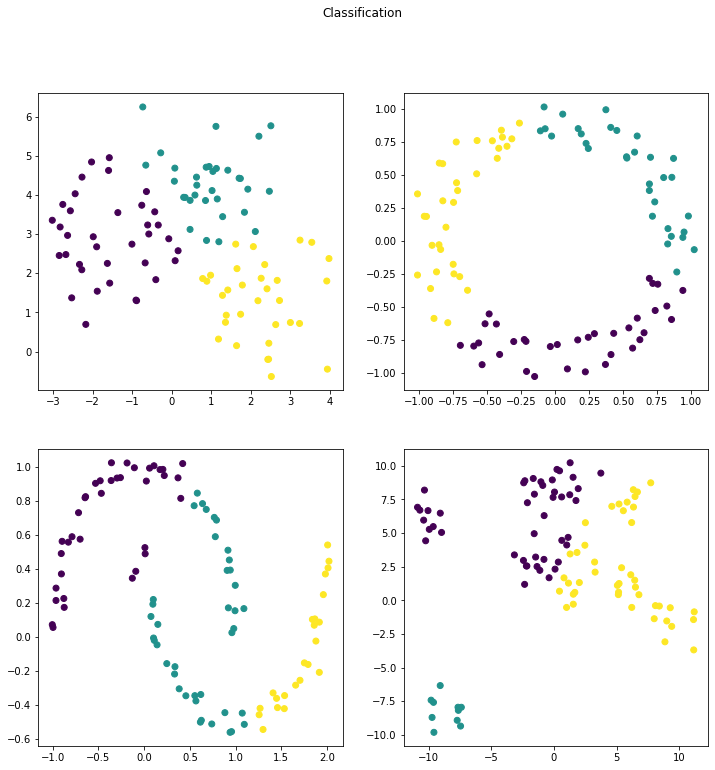

In [612]:
dots = 100
k = 3
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_regression
ConstX0, y = make_blobs(n_samples=dots,n_features = 2,
                  centers=3, random_state=0)
ConstX1, y = make_circles(n_samples=dots, noise=0.05)
ConstX2, y = make_moons(n_samples=dots, noise=0.05)
ConstX3, y = make_blobs(n_samples=dots,n_features = 2,
                  centers=10, random_state=0)
from sklearn.cluster import KMeans
a0 = KMeans(n_clusters=k,random_state=3).fit_predict(ConstX0)
a1 = KMeans(n_clusters=k,random_state=3).fit_predict(ConstX1)
a2 = KMeans(n_clusters=k,random_state=3).fit_predict(ConstX2)
a3 = KMeans(n_clusters=k,random_state=3).fit_predict(ConstX3)
 

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0,0].scatter(ConstX0[:, 0], ConstX0[:, 1],c=a0)
axs[0,1].scatter(ConstX1[:, 0], ConstX1[:, 1],c=a1)
axs[1,0].scatter(ConstX2[:, 0], ConstX2[:, 1],c=a2)
axs[1,1].scatter(ConstX3[:, 0], ConstX3[:, 1],c=a3)
fig.suptitle('Classification')

Классификация KMeans from sklearn










In [613]:
def ClasPred(dots,ConstX):
  Dis = np.array([])
  N = np.array([])
  for i in range(dots):
    N = np.append(N,i)
    for j in range(dots):
      #print(ConstX0[i,0],ConstX0[i,1])
      size = ((ConstX0[i,0]-ConstX0[j,0])**2+(ConstX0[i,1]-ConstX0[j,1])**2)**(1/2)
      Dis = np.append(Dis,size)
      
  Hist = plt.hist(Dis,bins=round(dots/2))[0]
  plt.show
  Hist
  classes = 0
  for i in range(round(np.shape(Hist)[0]*7/8)-1):
    if i > round(np.shape(Hist)[0]/2):
      if  Hist[i] < Hist[i+1]:
        classes = classes + 1
    elif Hist[i] < Hist[i+1]:
        classes = classes + 1
  return classes



Text(0.5, 0.98, 'Classification')

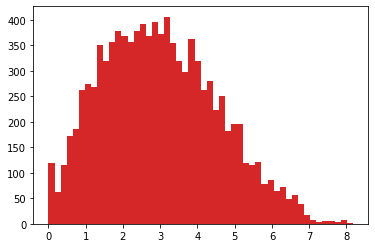

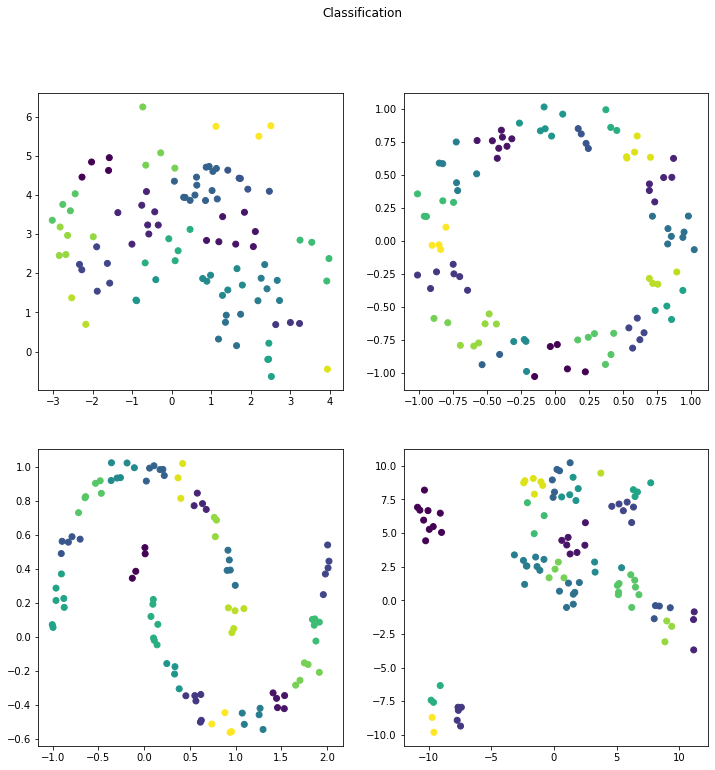

In [614]:
a0 = KMeans(n_clusters=ClasPred(dots,ConstX0),random_state=3).fit_predict(ConstX0)
a1 = KMeans(n_clusters=ClasPred(dots,ConstX1),random_state=3).fit_predict(ConstX1)
a2 = KMeans(n_clusters=ClasPred(dots,ConstX2),random_state=3).fit_predict(ConstX2)
a3 = KMeans(n_clusters=ClasPred(dots,ConstX3),random_state=3).fit_predict(ConstX3)
 

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0,0].scatter(ConstX0[:, 0], ConstX0[:, 1],c=a0)
axs[0,1].scatter(ConstX1[:, 0], ConstX1[:, 1],c=a1)
axs[1,0].scatter(ConstX2[:, 0], ConstX2[:, 1],c=a2)
axs[1,1].scatter(ConstX3[:, 0], ConstX3[:, 1],c=a3)
fig.suptitle('Classification')

Гистограмма попарных растояний, так как основная масса точек находится св близи друг друга, то до середниы гистограммы столбцы должны рости, а после середины уменьшаться, учитывая "аномальные точки", которые находятся в далеке от основной массы, их можно опустить, так как это будут одинарные классы, их можно будет включить к основным
Потом построим полученную классификацию функцией из Sklearn, и убидимся, что данный метод хорошо подходит для изолированных классов, что нельзя сказать о больших "размазанных" классах, где нету точного центра.

<function matplotlib.pyplot.show>

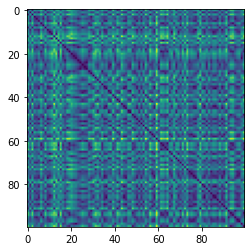

In [615]:
Dis = np.reshape(Dis,(-1,dots))
#print(Dis)
plt.imshow(Dis)
plt.show

График попарных расстояний


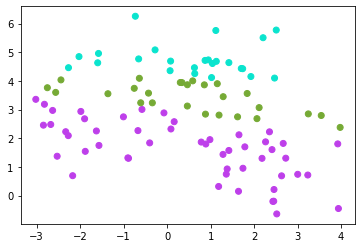

In [616]:
def kmeans_Print(X,k):
  color= ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(k)]
  # print(color)
  numbers = list(range(1,k+1))
  # print(numbers)
  class_to_color = dict(zip(numbers, color))
  plt.scatter(X[:, 1], X[:, 2], color=[class_to_color[c] for c in X[:, 0]])
  #print(class_to_color)
  return
def kmeans_Random_start(ConstX,k):
  X = ConstX
  dots = np.shape(X)[0]
  numbers = random.sample(list(np.arange(dots)),k)
  numbers = np.array(numbers)
  Y = []
  #print(numbers)
  i = 0
  #Как (X[element,:]) положить в массив Y?
  for element in numbers:
    Y.append(X[element,:])
  Y=np.array(Y)
  X.shape
  dis = np.array([])
  for  Mdots in Y:
    #print(Mdots)
    #print(Mdots[0])
    #print(Mdots[1])
    for dot in range(dots):
      length = ((Mdots[0]-X[dot,0])**2+(Mdots[1]-X[dot,1])**2)**(1/2)
      dis = np.append(dis,length)
      #print(length)
  # print(dis.shape)    
  dis = np.reshape(dis,(k,dots))
  dis = dis.T
  #print(dis)
  MinDis = np.amin(dis, axis = 1)
  #for dot in range(dots):
  #  for Mdots in Y:
  #    if(Mdots)
  a = 0
  X = np.insert(X, 0, values=0, axis=1) # Insert values before column 2
  for dot in range(dots):
    for i in range(k):
      if(dis[dot][i]==MinDis[dot]):
        X[dot][0] = i+1
  # seaborn.scatterplot(X[:,1],X[:,2],hue = X[:,0])
  return X
kmeans_Print(kmeans_Random_start(ConstX0,k),k)
#a = 10
#class_to_color = {1: "red", 2: "blue", 3: "green", 4: "purple"}
#plt.scatter(X[:, 1], X[:, 2], color=[class_to_color[c] for c in X[:, 0]])

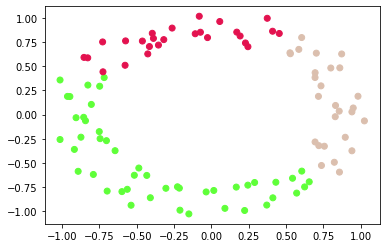

In [617]:
kmeans_Print(kmeans_Random_start(ConstX1,k),k)

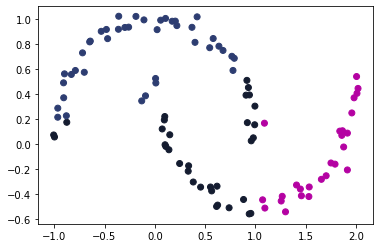

In [618]:
kmeans_Print( kmeans_Random_start(ConstX2,k),k)

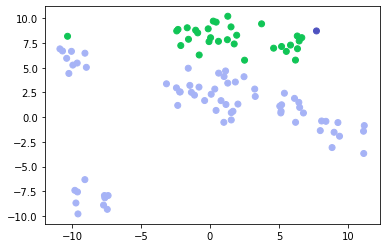

In [619]:
kmeans_Print( kmeans_Random_start(ConstX3,k),k)

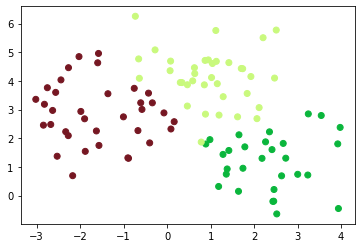

In [620]:
def ArrDis(X,Y,dots):
  dis = np.array([])
  for  Mdots in Y:
  #print(Mdots)
  #print(Mdots[0])
  #print(Mdots[1])
    for dot in range(dots):
      length = ((Mdots[0]-X[dot,0])**2+(Mdots[1]-X[dot,1])**2)**(1/2)
      dis = np.append(dis,length)
  return dis
def kmeans_Median_start(ConstX,k):
  X = ConstX
  dots = np.shape(X)[0]
  MaxX = X
  numbers = np.random.choice(np.arange(dots),1)
  Y = []
  CenterY = []
  for element in numbers:
    Y.append(X[element,:])
  Y=np.array(Y)
  CenterY = np.copy(Y)
  #print(Y)


  # print("Центральная точка",CenterY)
  for i in range(k-1):
    MaxDis = np.amax(ArrDis(X,CenterY,dots))
    MaxX = X
    #print(Y)
    #print(MaxDis)
    #print(dis)
    #print(X.shape)
    MaxX = np.insert(X, 2, ArrDis(X,CenterY,dots), axis=1) 
    for dot in range(dots):
      if(MaxX[dot,2]==MaxDis):
        #print(MaxX[dot,:2])
        #print(Y)
        for j in Y:
        # print("точки: ",j,MaxX[dot,:2])
          if (np.array_equal(j, MaxX[dot,:2])):
            #print("match",1)
            numbers = np.random.choice(np.arange(dots),k)
            for element in numbers:
              if np.array_equal(j, X[element,:])==False:
                MaxX[dot,:2] = X[element,:]
                break
        Y=np.append(Y,MaxX[dot,:2])
        Y=np.reshape(Y,(-1,2))
        # print(Y)
        break;
    #print(MaxX)
    #print(MaxDis)
    #print(Y)
    CenterY[:,0] = (np.mean(Y[:,0]))
    CenterY[:,1] = (np.mean(Y[:,1]))
    CenterY=np.array(CenterY)
    #print("Центральная точка",CenterY)
    #print("Точки класса:",Y)
  #print("Точки класса:",Y)


  dis = np.array([])
  for  Mdots in Y:
    #print(Mdots)
    #print(Mdots[0])
    #print(Mdots[1])
    for dot in range(dots):
      length = ((Mdots[0]-X[dot,0])**2+(Mdots[1]-X[dot,1])**2)**(1/2)
      dis = np.append(dis,length)
      #print(length)
  print()    
  dis = np.reshape(dis,(k,dots))
  dis = dis.T
  #print(dis)
  MinDis = np.amin(dis, axis = 1)
  #for dot in range(dots):
  #  for Mdots in Y:
  #    if(Mdots)
  a = 0
  X = np.insert(X, 0, values=0, axis=1) # Insert values before column 2
  for dot in range(dots):
    for i in range(k):
      if(dis[dot][i]==MinDis[dot]):
        X[dot][0] = i+1
  return X

kmeans_Print(kmeans_Median_start(ConstX0,k),k)

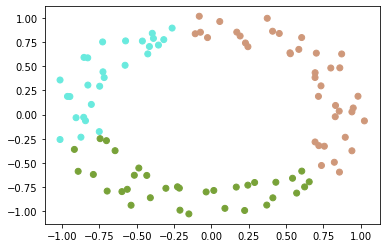

In [621]:
kmeans_Print(kmeans_Median_start(ConstX1,k),k)

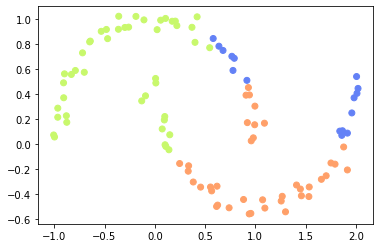

In [622]:
kmeans_Print(kmeans_Median_start(ConstX2,k),k)

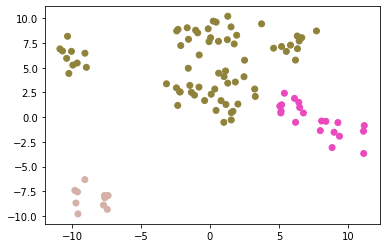

In [623]:
kmeans_Print(kmeans_Median_start(ConstX3,k),k)

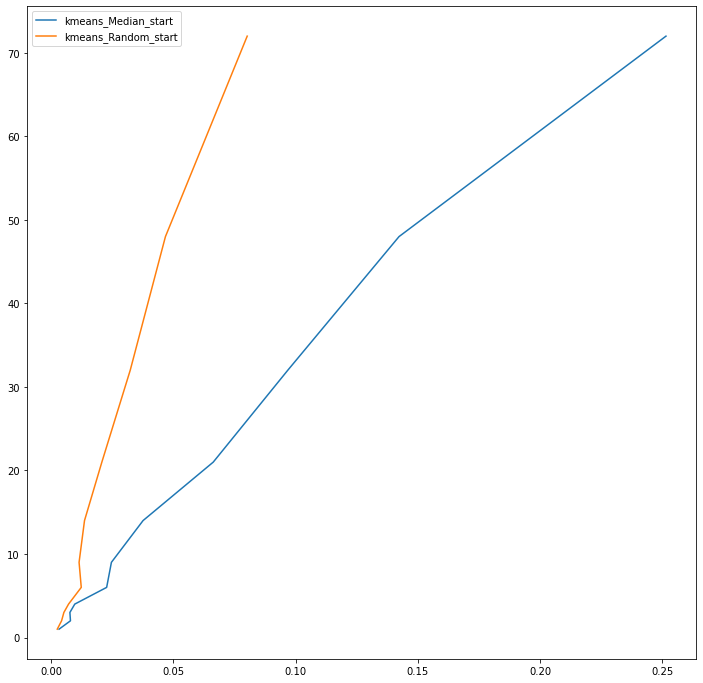

In [624]:
k=1
n = 100
ti_med = np.array([])
num_med = np.array([])
for i in range(n):
    start_time = time.time()
    kmeans_Median_start(ConstX2,k)
    ti_med = np.append(ti_med,(time.time() - start_time))
    num_med = np.append(num_med,k)
    k = k*2-round(k/2)
    # print(1)
    if k>dots:
      break
ti_rand = np.array([])
num_rand = np.array([])
k = 1
for i in range(n):
    start_time = time.time()
    kmeans_Random_start(ConstX2,k)
    ti_rand = np.append(ti_rand,(time.time() - start_time))
    num_rand = np.append(num_rand,k)
    k = k*2-round(k/2)
    #print(k,dots)
    if k>dots:
      break
#print(num_rand)
#print(ti_rand)
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(ti_med, num_med, label="kmeans_Median_start")
ax.plot(ti_rand, num_rand, label="kmeans_Random_start")
ax.legend()


Время вычисления, увеличивает линейно при увеличении количества колличества классов

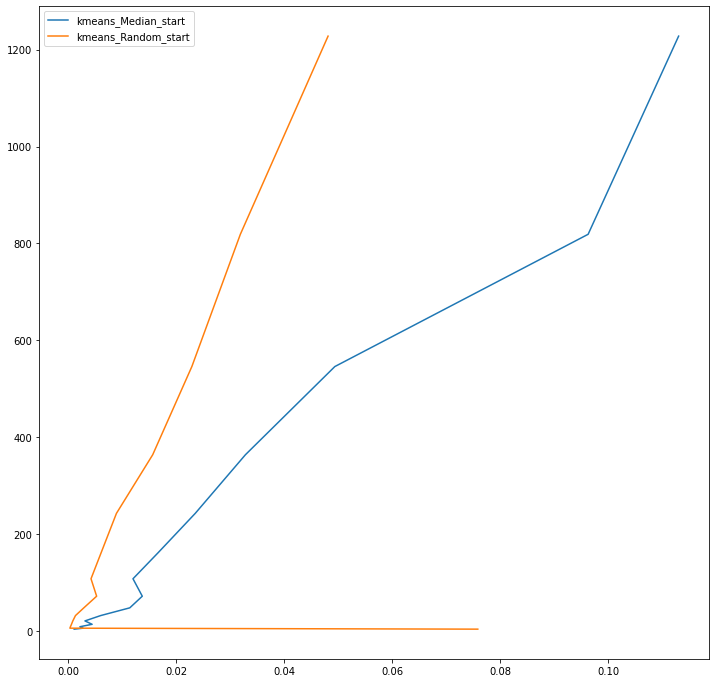

In [625]:
k=4
n = 15
dots = 4
ConstX0, y = make_blobs(n_samples=dots,n_features = 2,
                  centers=3, random_state=0)
ti_med = np.array([])
num_med = np.array([])
for i in range(n):
    #print("first")
    start_time = time.time()
    kmeans_Median_start(ConstX0,k)
    ti_med = np.append(ti_med,(time.time() - start_time))
    num_med = np.append(num_med,dots)
    dots = dots*2-round(dots/2)
    ConstX0, y = make_blobs(n_samples=dots,n_features = 2,
                  centers=3, random_state=0)
    # print(1)
ti_rand = np.array([])
num_rand = np.array([])
dots = 4
for i in range(round(n)):
    #print("second")
    start_time = time.time()
    kmeans_Random_start(ConstX0,k)
    ti_rand = np.append(ti_rand,(time.time() - start_time))
    num_rand = np.append(num_rand,dots)
    dots = dots*2-round(dots/2)
    ConstX0, y = make_blobs(n_samples=dots,n_features = 2,
                  centers=3, random_state=0)

#print(num_rand)
#print(ti_rand)
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(ti_med, num_med, label="kmeans_Median_start")
ax.plot(ti_rand, num_rand, label="kmeans_Random_start")
ax.legend()


На маленьких значения случайный выбор, действует очень долго Количество. За одну эпоху количество точек увеличивается в 1.5 раза. А количество времени увеличивается линейно относительно количества точек.

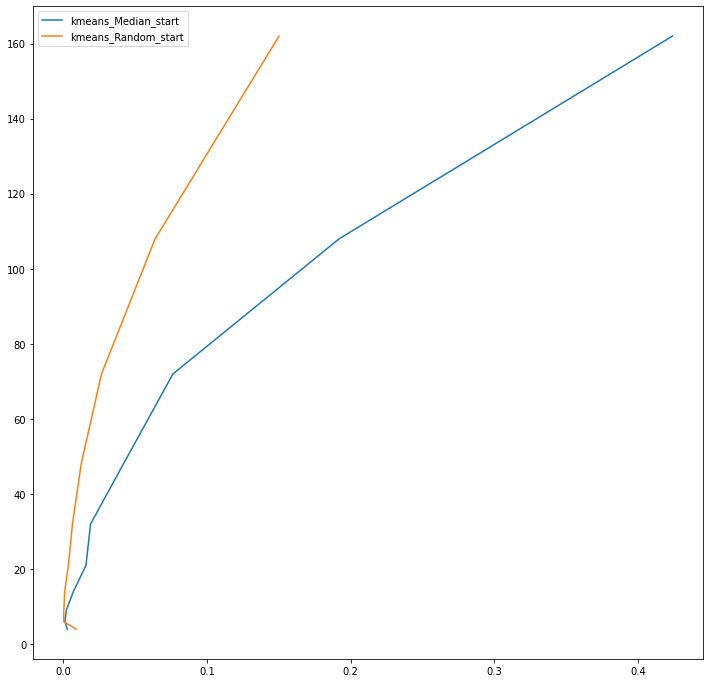

In [626]:
k=4
n = 10
dots = 4
ConstX0, y = make_blobs(n_samples=dots,n_features = 2,
                  centers=3, random_state=0)
ti_med = np.array([])
num_med = np.array([])
for i in range(n):
    # print("first")
    start_time = time.time()
    kmeans_Median_start(ConstX0,k)
    ti_med = np.append(ti_med,(time.time() - start_time))
    num_med = np.append(num_med,dots)
    dots = dots*2-round(dots/2)
    k = round(dots/2)
    ConstX0, y = make_blobs(n_samples=dots,n_features = 2,
                  centers=3, random_state=0)
    # print(1)
ti_rand = np.array([])
num_rand = np.array([])
dots = 4
k=4
for i in range(round(n)):
    #print("second")
    start_time = time.time()
    kmeans_Random_start(ConstX0,k)
    ti_rand = np.append(ti_rand,(time.time() - start_time))
    num_rand = np.append(num_rand,dots)
    dots = dots*2-round(dots/2)
    k = round(dots/2)
    ConstX0, y = make_blobs(n_samples=dots,n_features = 2,
                  centers=3, random_state=0)

#print(num_rand)
#print(ti_rand)
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(ti_med, num_med, label="kmeans_Median_start")
ax.plot(ti_rand, num_rand, label="kmeans_Random_start")
ax.legend()

А при линейном увеличении и классов и количества точек время вычислений увеличивается квадратично
